`Context:`

The Gurugram-based company ‘FlipItNews’ aims to revolutionize the way Indians perceive finance, business, and capital market investment, by giving it a boost through artificial intelligence (AI) and machine learning (ML). They’re on a mission to reinvent financial literacy for Indians, where financial awareness is driven by smart information discovery and engagement with peers. Through their smart content discovery and contextual engagement, the company is simplifying business, finance, and investment for millennials and first-time investors

`Objective:`

The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.

In [73]:
import pandas as pd 
import numpy as np 
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

'choco' is not recognized as an internal or external command,
operable program or batch file.


In [74]:
df = pd.read_csv('data\\flipitnews-data.csv')

In [75]:
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


# Shape of Data

In [76]:
df.shape

(2225, 2)

# Null Check


In [77]:
df.isna().sum()

Category    0
Article     0
dtype: int64

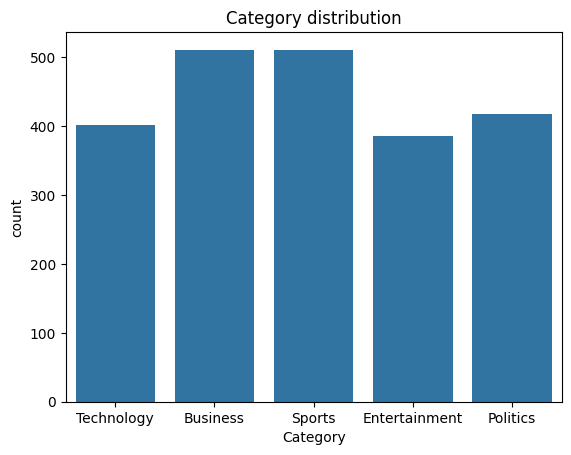

In [78]:
plt.title("Category distribution")
sns.countplot(x=df['Category'])
plt.show()

# Text PreProcessing

In [140]:
from nltk.corpus import stopwords
import pickle
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report

In [80]:
Label_encode = LabelEncoder()

In [81]:
# print(set(df['Category']))
# print(set(LabelEncoder().fit_transform(df['Category'])))

In [82]:
test_text = df['Article'][1]
stopword = stopwords.words('english')
stopword.extend(punctuation)

In [83]:
def get_text_preprocessed(words):
    words = words.lower()
    words = re.sub(r'[^a-zA-Z\s]', '', words)
    words = word_tokenize(words)
    words = [WordNetLemmatizer().lemmatize(word) for word in words if word not in stopword]
    words = " ".join(words)
    return words

In [84]:
print("Processed")
print(get_text_preprocessed(test_text))

Processed
worldcom bos left book alone former worldcom bos bernie ebbers accused overseeing bn bn fraud never made accounting decision witness told juror david myers made comment questioning defence lawyer arguing mr ebbers responsible worldcom problem phone company collapsed prosecutor claim loss hidden protect firm share mr myers already pleaded guilty fraud assisting prosecutor monday defence lawyer reid weingarten tried distance client allegation cross examination asked mr myers ever knew mr ebbers make accounting decision aware mr myers replied ever know mr ebbers make accounting entry worldcom book mr weingarten pressed replied witness mr myers admitted ordered false accounting entry request former worldcom chief financial officer scott sullivan defence lawyer trying paint mr sullivan admitted fraud testify later trial mastermind behind worldcom accounting house card mr ebbers team meanwhile looking portray affable bos admission pe graduate economist whatever ability mr ebbers tr

In [85]:
print("Unprocessed")
print(word_tokenize(test_text))

Unprocessed
['worldcom', 'boss', 'left', 'books', 'alone', 'former', 'worldcom', 'boss', 'bernie', 'ebbers', 'who', 'is', 'accused', 'of', 'overseeing', 'an', '$', '11bn', '(', '£5.8bn', ')', 'fraud', 'never', 'made', 'accounting', 'decisions', 'a', 'witness', 'has', 'told', 'jurors', '.', 'david', 'myers', 'made', 'the', 'comments', 'under', 'questioning', 'by', 'defence', 'lawyers', 'who', 'have', 'been', 'arguing', 'that', 'mr', 'ebbers', 'was', 'not', 'responsible', 'for', 'worldcom', 's', 'problems', '.', 'the', 'phone', 'company', 'collapsed', 'in', '2002', 'and', 'prosecutors', 'claim', 'that', 'losses', 'were', 'hidden', 'to', 'protect', 'the', 'firm', 's', 'shares', '.', 'mr', 'myers', 'has', 'already', 'pleaded', 'guilty', 'to', 'fraud', 'and', 'is', 'assisting', 'prosecutors', '.', 'on', 'monday', 'defence', 'lawyer', 'reid', 'weingarten', 'tried', 'to', 'distance', 'his', 'client', 'from', 'the', 'allegations', '.', 'during', 'cross', 'examination', 'he', 'asked', 'mr', 'my

In [86]:
df['processd_article'] = df['Article'].apply(get_text_preprocessed)

In [87]:
categories = Label_encode.fit(df['Category'])
df['Category_enc'] = categories.transform(df['Category'])

In [88]:
df.head()

,Category,Article,processd_article,Category_enc
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...,4
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...,0
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...,3
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...,3
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...,1


In [89]:
print("Processed   : ",word_tokenize(df['Article'][4]))
print("Unprocessed : ",df['processd_article'][4])

Processed   :  ['ocean', 's', 'twelve', 'raids', 'box', 'office', 'ocean', 's', 'twelve', 'the', 'crime', 'caper', 'sequel', 'starring', 'george', 'clooney', 'brad', 'pitt', 'and', 'julia', 'roberts', 'has', 'gone', 'straight', 'to', 'number', 'one', 'in', 'the', 'us', 'box', 'office', 'chart', '.', 'it', 'took', '$', '40.8m', '(', '£21m', ')', 'in', 'weekend', 'ticket', 'sales', 'according', 'to', 'studio', 'estimates', '.', 'the', 'sequel', 'follows', 'the', 'master', 'criminals', 'as', 'they', 'try', 'to', 'pull', 'off', 'three', 'major', 'heists', 'across', 'europe', '.', 'it', 'knocked', 'last', 'week', 's', 'number', 'one', 'national', 'treasure', 'into', 'third', 'place', '.', 'wesley', 'snipes', 'blade', ':', 'trinity', 'was', 'in', 'second', 'taking', '$', '16.1m', '(', '£8.4m', ')', '.', 'rounding', 'out', 'the', 'top', 'five', 'was', 'animated', 'fable', 'the', 'polar', 'express', 'starring', 'tom', 'hanks', 'and', 'festive', 'comedy', 'christmas', 'with', 'the', 'kranks', '

# BOW

In [131]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
pd.set_option('display.max_rows',None)

In [91]:
c_vectorizer = CountVectorizer()
c_vect= c_vectorizer.fit(df['processd_article'])
X_bow = c_vect.transform(df['processd_article']).toarray()
Y = df['Category_enc'].to_numpy()

In [92]:
X_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [93]:
X_bow.shape

(2225, 27175)

In [209]:
xtrain,xtest,ytrain,ytest = tts(X_bow,Y,test_size=0.23)

In [210]:
print(f'train shape {xtrain.shape}  test shape {xtest.shape} , ytrain shape {ytrain.shape} , ytest shape {ytest.shape}')

train shape (1713, 27175)  test shape (512, 27175) , ytrain shape (1713,) , ytest shape (512,)


In [211]:
naive_bs_model = GaussianNB()
naive_bs_model.fit(xtrain,ytrain)

GaussianNB()

In [115]:
pred = naive_bs_model.predict(xtest)

In [116]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       109
           1       0.94      0.85      0.89       105
           2       0.85      0.89      0.87        93
           3       0.99      0.94      0.97       118
           4       0.84      0.91      0.87        87

    accuracy                           0.90       512
   macro avg       0.90      0.90      0.90       512
weighted avg       0.90      0.90      0.90       512



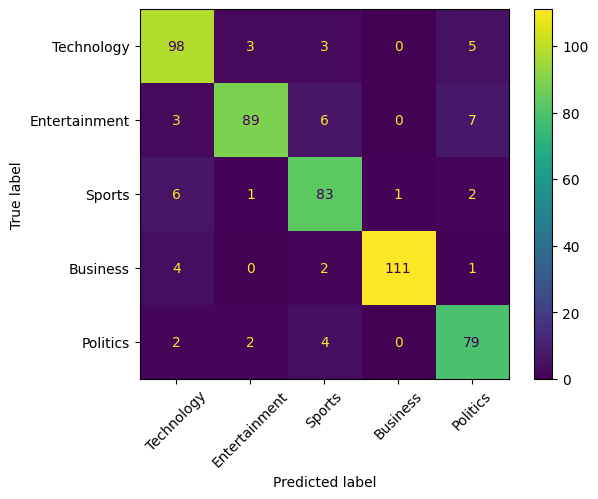

In [130]:
ConfusionMatrixDisplay(confusion_matrix(ytest,pred),display_labels=list(set(Label_encode.inverse_transform(pred)))).plot()
plt.xticks(rotation=45)
plt.show()

In [143]:
print("Model Accuracy with Naive Bayes with BOW : ",naive_bs_model.score(xtest,ytest))

Model Accuracy with Naive Bayes with BOW :  0.8984375


In [121]:
def test_text_function(text,vector_embed_type='bow'):
    preprocess_text = get_text_preprocessed(text)
    if(vector_embed_type=='bow'):
        cv_vect = c_vect.transform([preprocess_text]).toarray()
    pred = naive_bs_model.predict(cv_vect)
    return(Label_encode.inverse_transform(pred)[0])

In [124]:
test_text_function(df['Article'][2216])

'Entertainment'

In [125]:
df.tail(10)

,Category,Article,processd_article,Category_enc
2215,Technology,junk e-mails on relentless rise spam traffic i...,junk email relentless rise spam traffic puttin...,4
2216,Entertainment,top stars join us tsunami tv show brad pitt r...,top star join u tsunami tv show brad pitt robe...,1
2217,Technology,rings of steel combat net attacks gambling is ...,ring steel combat net attack gambling hugely p...,4
2218,Sports,davies favours gloucester future wales hooker ...,davy favour gloucester future wale hooker mefi...,3
2219,Business,beijingers fume over parking fees choking traf...,beijingers fume parking fee choking traffic ja...,0
2220,Business,cars pull down us retail figures us retail sal...,car pull u retail figure u retail sale fell ja...,0
2221,Politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy exchatshow h...,2
2222,Entertainment,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert u band rem an...,1
2223,Politics,how political squabbles snowball it s become c...,political squabble snowball become commonplace...,2
2224,Sports,souness delight at euro progress boss graeme s...,souness delight euro progress bos graeme soune...,3


# Embeddding Using TF-IDF

In [132]:
tf_vectorizer = TfidfVectorizer()
tf_vect= tf_vectorizer.fit(df['processd_article'])
X_tf = tf_vectorizer.transform(df['processd_article']).toarray()

In [134]:
tf_xtrain,tf_xtest,tf_ytrain,tf_ytest = tts(X_tf,Y,test_size=0.23)
print(f'train shape {tf_xtrain.shape}  test shape {tf_xtest.shape} , ytrain shape {tf_ytrain.shape} , ytest shape {tf_ytest.shape}')

train shape (1713, 27175)  test shape (512, 27175) , ytrain shape (1713,) , ytest shape (512,)


In [135]:
naive_bs_model_tf = GaussianNB()
naive_bs_model_tf.fit(tf_xtrain,tf_ytrain)

GaussianNB()

In [136]:
tf_pred = naive_bs_model_tf.predict(tf_xtest)

In [137]:
print(classification_report(tf_ytest,tf_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       124
           1       0.96      0.91      0.94        89
           2       0.86      0.95      0.90        95
           3       0.99      0.97      0.98       115
           4       0.91      0.97      0.93        89

    accuracy                           0.93       512
   macro avg       0.93      0.93      0.93       512
weighted avg       0.93      0.93      0.93       512



In [142]:
print("Model Accuracy with Naive Bayes with TF-IDF: ",naive_bs_model_tf.score(tf_xtest,tf_ytest))

Model Accuracy with Naive Bayes with TF-IDF:  0.9296875


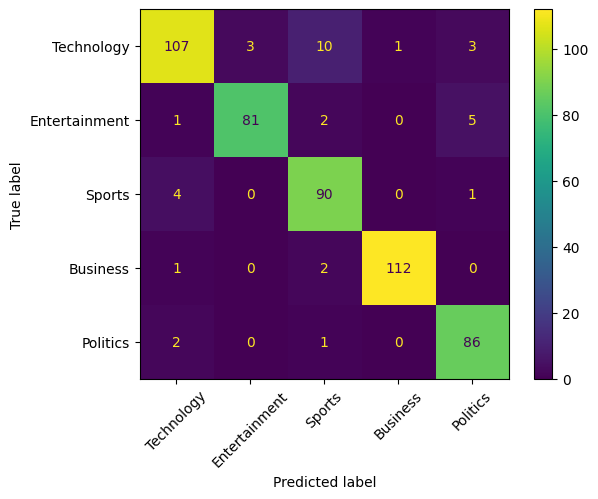

In [138]:
ConfusionMatrixDisplay(confusion_matrix(tf_ytest,tf_pred),display_labels=list(set(Label_encode.inverse_transform(pred)))).plot()
plt.xticks(rotation=45)
plt.show()

In [166]:
def test_text_function(text,vector_embed_type='bow'):
    " This Function will preprocess and give predictions of text belonging to certain class"
    ans  = None
    preprocess_text = get_text_preprocessed(text)                                # Preprocessing
    if(vector_embed_type=='bow'):
        with open('naive_bs_model.pkl', 'rb') as file:                           # Loading Model
            naive_bs_model = pickle.load(file)
        cv_vect = c_vect.transform([preprocess_text]).toarray()
        pred = naive_bs_model.predict(cv_vect)                                   # Predicting
        ans = Label_encode.inverse_transform(pred)[0]                            # predicting class
    elif(vector_embed_type=='tf'):
        with open('tf_idf_model.pkl', 'rb') as file:
            naive_bs_model_tf = pickle.load(file)
        tf_vects = tf_vect.transform([preprocess_text]).toarray()
        pred = naive_bs_model_tf.predict(tf_vects)
        ans = Label_encode.inverse_transform(pred)[0]
    else:
        print("Invalid vector embed type")
    return ans 

# Testing model on different text input

In [168]:
Accutal_class = (df.iloc[2184,:][0])
print("Accutal class : ",Accutal_class)
pred = test_text_function(df['Article'][2184],'tf')
print("Prediciton : ",pred)

Accutal class :  Business
Prediciton :  Business


C:\Users\gaura\AppData\Local\Temp\ipykernel_11848\982742917.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Accutal_class = (df.iloc[2184,:][0])


In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Using BOW Data training RandomForest

In [180]:
random_forest_classifier =RandomForestClassifier()
random_forest_classifier.fit(xtrain,ytrain)

RandomForestClassifier()

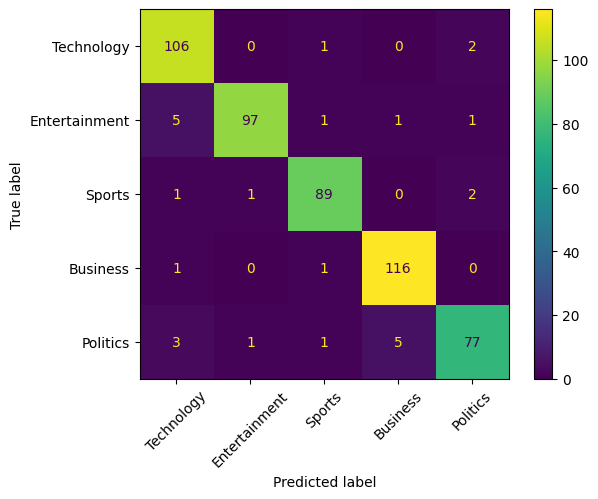

In [181]:
random_f_pred = random_forest_classifier.predict(xtest)
ConfusionMatrixDisplay(confusion_matrix(ytest,random_f_pred),display_labels=list(set(Label_encode.inverse_transform(random_f_pred)))).plot()
plt.xticks(rotation=45)
plt.show()

In [182]:
print(classification_report(ytest,random_f_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       109
           1       0.98      0.92      0.95       105
           2       0.96      0.96      0.96        93
           3       0.95      0.98      0.97       118
           4       0.94      0.89      0.91        87

    accuracy                           0.95       512
   macro avg       0.95      0.94      0.95       512
weighted avg       0.95      0.95      0.95       512



In [183]:
print("Model Accuracy with Random Forest with BOW: ",round(random_forest_classifier.score(xtest,ytest),2))

Model Accuracy with Random Forest with BOW:  0.95


# Using TF-IDF Data training RandomForest

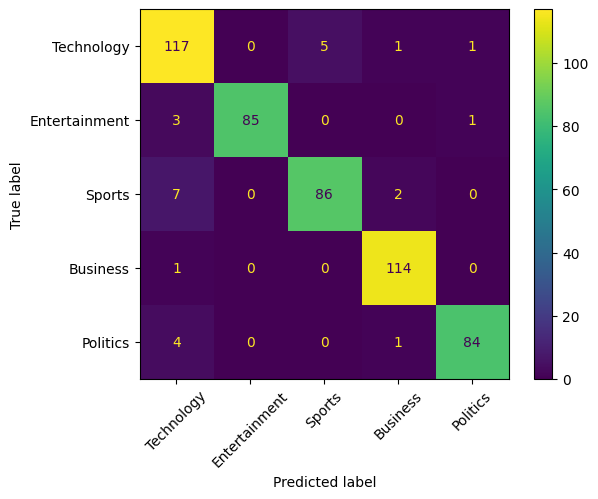

In [186]:
random_forest_classifier_tf =RandomForestClassifier()
random_forest_classifier_tf.fit(tf_xtrain,tf_ytrain)

random_f_pred_tf = random_forest_classifier_tf.predict(tf_xtest)
ConfusionMatrixDisplay(confusion_matrix(tf_ytest,random_f_pred_tf),display_labels=list(set(Label_encode.inverse_transform(random_f_pred_tf)))).plot()
plt.xticks(rotation=45)
plt.show()

In [187]:
print("Model Accuracy with Random Forest with TF-IDF: ",round(random_forest_classifier_tf.score(tf_xtest,tf_ytest),2))

Model Accuracy with Random Forest with TF-IDF:  0.95


In [188]:
print(classification_report(tf_ytest,random_f_pred_tf))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       124
           1       1.00      0.96      0.98        89
           2       0.95      0.91      0.92        95
           3       0.97      0.99      0.98       115
           4       0.98      0.94      0.96        89

    accuracy                           0.95       512
   macro avg       0.95      0.95      0.95       512
weighted avg       0.95      0.95      0.95       512



# Using BOW Data training Decision Tree

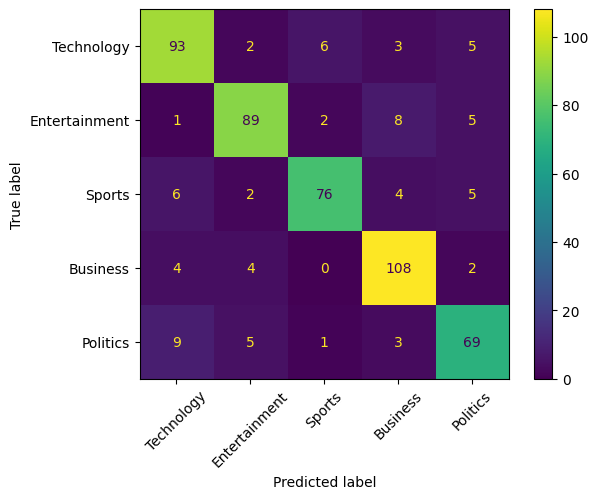

In [189]:
DS_classifier = DecisionTreeClassifier()
DS_classifier.fit(xtrain,ytrain)

ds_f_pred = DS_classifier.predict(xtest)
ConfusionMatrixDisplay(confusion_matrix(ytest,ds_f_pred),display_labels=list(set(Label_encode.inverse_transform(ds_f_pred)))).plot()
plt.xticks(rotation=45)
plt.show()

In [190]:
print("Model Accuracy with Decision Tree with BOW: ",round(DS_classifier.score(xtest,ytest),2))

Model Accuracy with Decision Tree with BOW:  0.85


In [191]:
print(classification_report(ytest,ds_f_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       109
           1       0.87      0.85      0.86       105
           2       0.89      0.82      0.85        93
           3       0.86      0.92      0.89       118
           4       0.80      0.79      0.80        87

    accuracy                           0.85       512
   macro avg       0.85      0.85      0.85       512
weighted avg       0.85      0.85      0.85       512



# Using TF-IDF Data training Decision Tree

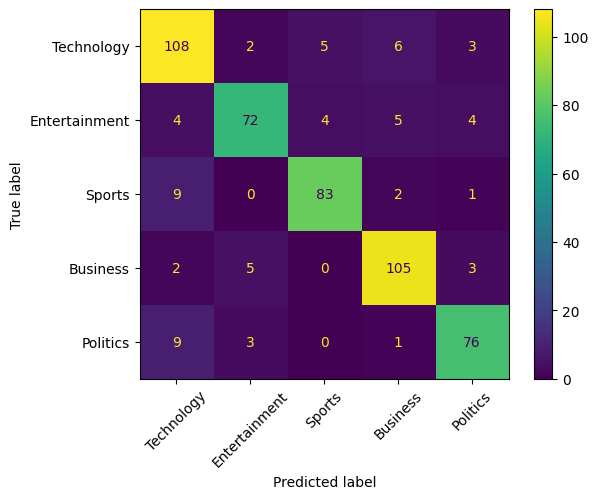

In [192]:
DS_classifier_tf =DecisionTreeClassifier()
DS_classifier_tf.fit(tf_xtrain,tf_ytrain)

DS_f_pred_tf = DS_classifier_tf.predict(tf_xtest)
ConfusionMatrixDisplay(confusion_matrix(tf_ytest,DS_f_pred_tf),display_labels=list(set(Label_encode.inverse_transform(DS_f_pred_tf)))).plot()
plt.xticks(rotation=45)
plt.show()

In [193]:
print("Model Accuracy with Decision Tree with BOW: ",round(DS_classifier_tf.score(tf_xtest,tf_ytest),2))

Model Accuracy with Decision Tree with BOW:  0.87


In [194]:
print(classification_report(tf_ytest,DS_f_pred_tf))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       124
           1       0.88      0.81      0.84        89
           2       0.90      0.87      0.89        95
           3       0.88      0.91      0.90       115
           4       0.87      0.85      0.86        89

    accuracy                           0.87       512
   macro avg       0.87      0.86      0.87       512
weighted avg       0.87      0.87      0.87       512



# Consolidating Metrics

In [195]:
model_metrics = pd.DataFrame()

In [196]:
model_metrics['model_name'] = ['NaiveBayes','NaiveBayes','RandomForest','RandomForest', 'DecisionTree','DecisionTree']

In [198]:
model_metrics['Vectorize_technique'] = ['BOW','TF-IDF','BOW','TF-IDF','BOW','TF-IDF']

In [202]:
model_metrics['Accuracy(%)'] = [90,93,95,95,85,87]

In [205]:
model_metrics

,model_name,Vectorize_technique,Accuracy(%)
0,NaiveBayes,BOW,90
1,NaiveBayes,TF-IDF,93
2,RandomForest,BOW,95
3,RandomForest,TF-IDF,95
4,DecisionTree,BOW,85
5,DecisionTree,TF-IDF,87


Questionnaire:

How many news articles are present in the dataset that we have? `5 Articles`

Most of the news articles are from `sports` category.

Only `401` no. of articles belong to the ‘Technology’ category.

What are Stop Words and why should they be removed from the text data?

`Ans :  Words like "a","an" are known as stopword, it is important to remove them because they dont contribute more in prediction.`

Explain the difference between Stemming and Lemmatization.

`Ans : Stemming convert words to there root form without having proper human readble meaning, whereas Lemmatization convert words to root form with meaning full context.`

Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?

`Ans : Tf-IDF is more efficient than Bag of Words , because they dont consider all words with same importance as it is done in BOW.`

What’s the shape of train & test data sets after performing a 75:25 split.

`Ans :  train shape (1668, 27175)  test shape (557, 27175) , ytrain shape (1668,) , ytest shape (557,)`


Which of the following is found to be the best performing model..

`Ans  : Random Forest`

According to this particular use case, both precision and recall are equally important. (T/F)

`Ans  : T`